<a href="https://colab.research.google.com/github/AhsanAbir001/ML-Lab-EWU/blob/main/Lab%203%20(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Fashion MNIST Dataset
fashion_mnist = fetch_openml('Fashion-MNIST')

# Extract data and target
X = fashion_mnist['data']
y = fashion_mnist['target']

# Convert target to integer type
y = y.astype(int)

# Normalize the data (pixel values are between 0 and 255, so divide by 255)
X = X / 255.0

# Show basic dataset info
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality, let's reduce to 100 principal components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Shape of X_train after PCA:", X_train_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)

Shape of X_train after PCA: (56000, 100)
Shape of X_test after PCA: (14000, 100)


In [4]:
#without PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Train SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print accuracy of each model without PCA
print("Decision Tree accuracy without PCA:", dt_accuracy)
print("Random Forest accuracy without PCA:", rf_accuracy)
print("SVM accuracy without PCA:", svm_accuracy)

Decision Tree accuracy without PCA: 0.794
Random Forest accuracy without PCA: 0.8825
SVM accuracy without PCA: 0.8887857142857143


In [5]:
#With PCA
# Train Decision Tree with PCA
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_pca.predict(X_test_pca)
dt_pca_accuracy = accuracy_score(y_test, y_pred_dt_pca)

# Train Random Forest with PCA
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)
rf_pca_accuracy = accuracy_score(y_test, y_pred_rf_pca)

# Train SVM with PCA
svm_pca = SVC(random_state=42)
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)
svm_pca_accuracy = accuracy_score(y_test, y_pred_svm_pca)

# Print accuracy of each model with PCA
print("Decision Tree accuracy with PCA:", dt_pca_accuracy)
print("Random Forest accuracy with PCA:", rf_pca_accuracy)
print("SVM accuracy with PCA:", svm_pca_accuracy)

Decision Tree accuracy with PCA: 0.7665
Random Forest accuracy with PCA: 0.8675
SVM accuracy with PCA: 0.8907142857142857


In [11]:
print("\n--- Comparison of Results ---")
print("Decision Tree Accuracy: Without PCA = {:.4f}, With PCA = {:.4f}".format(dt_accuracy, dt_pca_accuracy))
print("Random Forest Accuracy: Without PCA = {:.4f}, With PCA = {:.4f}".format(rf_accuracy, rf_pca_accuracy))
print("SVM Accuracy: Without PCA = {:.4f}, With PCA = {:.4f}".format(svm_accuracy, svm_pca_accuracy))


--- Comparison of Results ---
Decision Tree Accuracy: Without PCA = 0.7940, With PCA = 0.7665
Random Forest Accuracy: Without PCA = 0.8825, With PCA = 0.8675
SVM Accuracy: Without PCA = 0.8888, With PCA = 0.8907


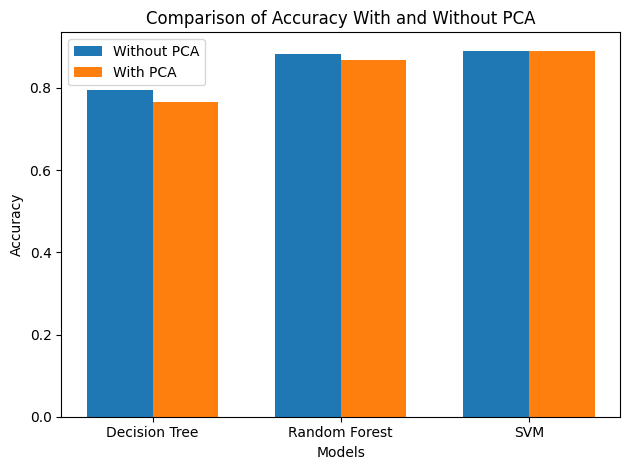

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Decision Tree', 'Random Forest', 'SVM']

# Accuracy scores
accuracy_without_pca = [dt_accuracy, rf_accuracy, svm_accuracy]
accuracy_with_pca = [dt_pca_accuracy, rf_pca_accuracy, svm_pca_accuracy]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_without_pca, width, label='Without PCA')
rects2 = ax.bar(x + width/2, accuracy_with_pca, width, label='With PCA')


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy With and Without PCA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

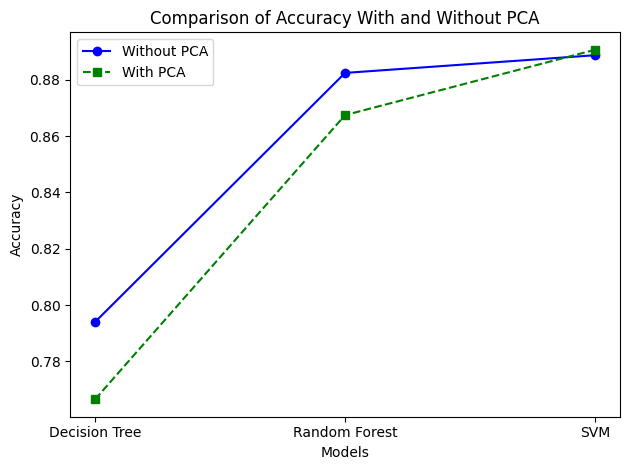

In [8]:
models = ['Decision Tree', 'Random Forest', 'SVM']

accuracy_without_pca = [dt_accuracy, rf_accuracy, svm_accuracy]
accuracy_with_pca = [dt_pca_accuracy, rf_pca_accuracy, svm_pca_accuracy]

x = np.arange(len(models))

fig, ax = plt.subplots()
ax.plot(x, accuracy_without_pca, label='Without PCA', marker='o', linestyle='-', color='b')
ax.plot(x, accuracy_with_pca, label='With PCA', marker='s', linestyle='--', color='g')


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy With and Without PCA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

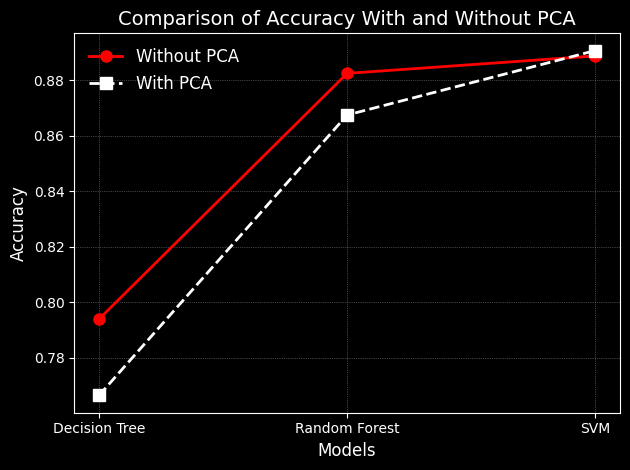

In [9]:
models = ['Decision Tree', 'Random Forest', 'SVM']


accuracy_without_pca = [dt_accuracy, rf_accuracy, svm_accuracy]
accuracy_with_pca = [dt_pca_accuracy, rf_pca_accuracy, svm_pca_accuracy]

x = np.arange(len(models))

plt.style.use('dark_background')

fig, ax = plt.subplots()

ax.plot(x, accuracy_without_pca, label='Without PCA', marker='o', linestyle='-', color='red', linewidth=2, markersize=8)
ax.plot(x, accuracy_with_pca, label='With PCA', marker='s', linestyle='--', color='white', linewidth=2, markersize=8)

ax.grid(True, which='both', color='gray', linestyle=':', linewidth=0.5)

ax.set_xlabel('Models', fontsize=12, color='white')
ax.set_ylabel('Accuracy', fontsize=12, color='white')
ax.set_title('Comparison of Accuracy With and Without PCA', fontsize=14, color='white')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10, color='white')
ax.tick_params(axis='y', colors='white')

ax.legend(loc='upper left', fontsize=12, frameon=False)

fig.tight_layout()

plt.show()